<h1><center>Multi-layer Perceptron</center></h1>
<h3><center> Djoser SIMEU M2 MOSIG</center></h3>

In this mini-project, we will implement a simple one hidden layer neural network from scratch.
Even if you will use deep learning libraries like Pytorch or Tensorflow later, implementing a network from scratch at least once is an extremely useful exercise, essential for designing and optimizing your own models effectively.


In [184]:


# Imports of useful packages
import matplotlib # For the plots
import matplotlib.pyplot as plt 
import numpy as np # To perform operations on matrices efficiently


# We will use the sklearn library to compare our neural network to that 
# of a simpler approach like logistic regression

import sklearn 
import sklearn.datasets
import sklearn.linear_model

from math import exp,log

# To display plots inline and adjust the display

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

# Generating a dataset

Let's start by generating a dataset that we can play with. The scikit-learn machine learning library has a few useful data generators, saving us the trouble of writing the code ourselves. We will use the make_moons function, which creates a two-class dataset of two-dimensional examples in the shape of two half-moons: each of the half-moons corresponds to a class.

In [185]:
np.random.seed(1)
X, y = sklearn.datasets.make_moons(n_samples=300, noise=0.20)  # We create a dataset with 300 elements


 <font color='red'><b>Question 1.</b></font> Show the coordinates and labels of the first two elements of the dataset.



In [186]:
# You can use f-string as proposed below (https://www.geeksforgeeks.org/formatted-string-literals-f-strings-python/)
print(f"The first coordinate point {X[0]} has a label {y[0]}")
print(f"The second coordinate poin {X[1]} has a label {y[1]}")


The first coordinate point [ 0.21073485 -0.0159868 ] has a label 1
The second coordinate poin [-0.82910413  0.65187765] has a label 0


We can display this dataset easily using Matplotlib using colors to make the labels appear $y$ : 

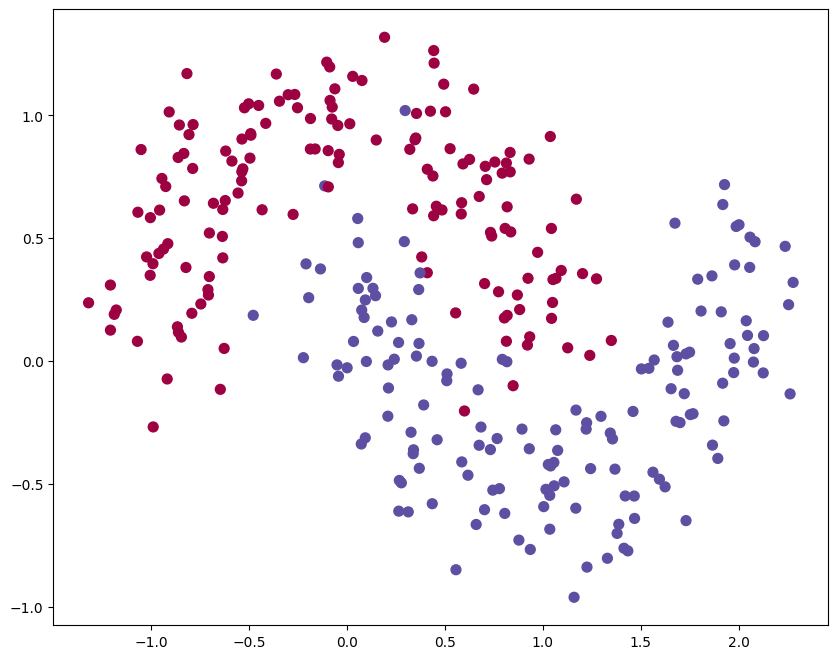

In [187]:
plt.scatter(X[:,0], X[:,1], s=50, c=y+1, cmap=plt.cm.Spectral)
plt.show()

The dataset we generated has two classes, represented by red and blue dots.

Our goal is to train a classifier that predicts the correct class from point coordinates $x_1$ et $x_2$. 

# Find the best line manually

In this part we will try to find the best line that separates our cloud of points manually.

<font color='red'><b>Question 2</b></font>  Creates a function that returns 1 if a coordinate point $(x_1,x_2$) is below the line with slope $a$ and the bias $b$.

In [188]:
def pred_linear(a: float, b: float, x1: float, x2: float):
    if(a*x1+b > x2):
        return 1
    else:
        return 0

    

It is important to be able to evaluate the performance of our approaches using metrics. Here, we will choose the accuracy which is simply the number of well-classified elements divided by the total number of elements. To learn more about classification metrics like precision, recall and their link with accuracy, you can consult the following excellent Wikipedia (if you plan to do Machine Learning later, the notion of precision/recall is a classic) https://en.wikipedia.org/wiki/Precision_and_recall

<font color='red'><b>Question 3.</b></font> Complete the following accuracy function. (1 Python line with the comprehension of a list)

In [189]:
def accuracy(y_true, y_pred):
    """
    Args:
        y_true (list[int]): A list of integers having values in {0,1} that contain the class labels
        y_pred (list[int]): A list of integers having values in {0,1} that contain the predictions of the model

    Returns:
        float: The Accuracy of the model
    
    Example:
    >>> accuracy([0,0,1], [0,1,1])
    0.666...
    """
    acc=0 #Defining an accumulator
    for y_t,y_p in zip(y_true,y_pred):
        if y_t == y_p:
            acc+=1 #Increment it for each good prediction
    return acc/len(y_true) #Return the number of good prediction divided by the total number of predictions

In [190]:
print(accuracy([0,0,1], [0,1,1]))

0.6666666666666666


In [191]:
#### display function
def plot_decision_boundary(pred_func):
    """
    Shows the decision boundaries of a binary prediction function.
    """
    # Set grid dimensions and give some margin for display
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.01
    # Generate the grid of points with a distance of h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Drawing the decision boundary
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Show contour and training points
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

<font color='red'><b>Question 4.</b></font>  Play by hand with parameters $a$ and $b$ to obtain several linear decision boundaries and try to obtain at least 80% accuracy.



le score obtenu est de:  0.8066666666666666


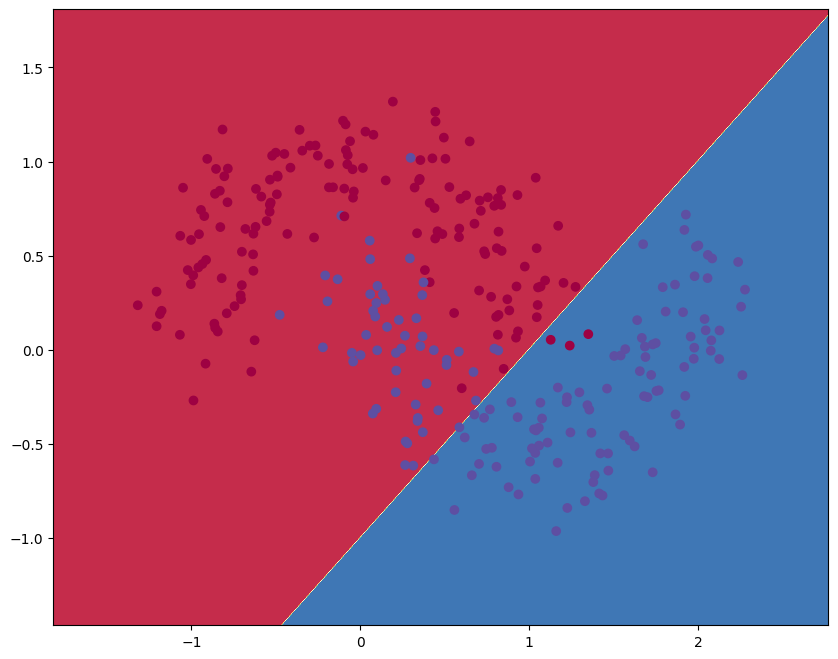

In [192]:
a =1#TODO
b = -1 #TODO
def prediction(A, a, b, func):
    return np.array([func(a=a, b=b, x1=x[0], x2=x[1]) for x in A])
plot_decision_boundary(lambda x: prediction(x, a, b, pred_linear))
print('le score obtenu est de: ', accuracy(y, prediction(X, a, b, pred_linear)))

# Logistic Regression

Scikit-learn has models such as logistic regression which can find the optimal parameters a and b:

In [193]:
classifier = sklearn.linear_model.LogisticRegressionCV()

 <font color='red'><b>Question 5.</b></font> Train this logistic regression model on the dataset (X,y). You can use the Scikit-learn documentation to see how to train a model on data: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [194]:
classifier.fit(X,y)

LogisticRegressionCV()

Once the model is trained, it can be used to predict and draw the decision boundary:

le score obtenu est de:  0.8566666666666667


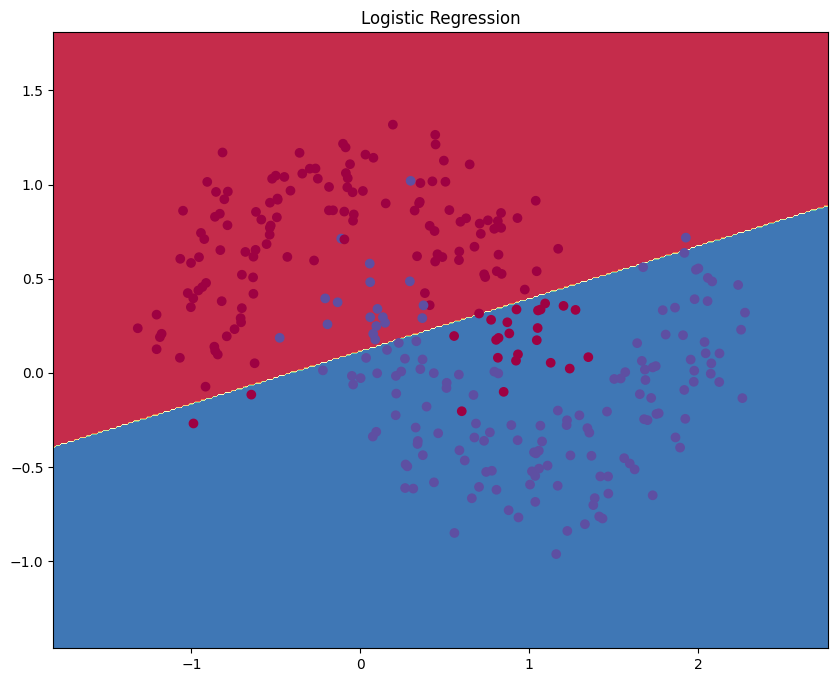

In [195]:
plot_decision_boundary(lambda x: classifier.predict(x))
plt.title("Logistic Regression")
print('le score obtenu est de: ', accuracy(y, classifier.predict(X)))

 <font color='red'><b>Question 6.</b></font> What do you observe? Was such a result predictable? What can we do to improve our predictions?

I observe that our logistic regression hasn't succeeded in significantly improving the accuracy of the classifier defined by hand in Question 4. It was predictable because a logistic regression corresponds to a linear classifier, and in our context, the classes are not linearly separable, as we can see on the graph. We could improve our predictions by using polynomials of our input features or by using MLP model to introduce non-linearity in our model and to project our input features into another space where we can linearly separate the different classes.

<font color='red'><b>Bonus Question.</b></font> Find the coefficients $a, b$ obtained by Scikit-learn logistic regression.

In [196]:
#Actually our classifier do ax+by=c where c is the intercept constant but we want to have ax+b=y by solving the equation we obtain (-a/b)x-c/b=y 
a =classifier.coef_[0][0]/classifier.coef_[0][1]
b=classifier.intercept_[0]/classifier.coef_[0][1] 
print("a = ",-a)
print ("b = ",-b)

a =  0.2793062083154947
b =  0.11231794099780207


# Neural Networks

You will now create a neural network to solve the previous problem.

In [197]:
# We will reuse the same datasets as previously, be careful X and y will be global variables for the rest 
# (to be avoided in general, but simplifies the notations for this mini porject)
np.random.seed(1)
X, y = sklearn.datasets.make_moons(300, noise=0.20)

 <font color='red'><b> Question 7</b></font> Complete the following variables and functions to code a **two-layer** neural network (1 hidden layer). The hidden layer will currently have **10 neurons** and we will use a learning rate of 3e-2.


In [198]:
# number of examples in the training set

N =  len(X) #TODO size of the dataset

# dimension of the input
d_input = 2 #TODO 2 input features (x,y for each datpoints)

# dimension of the output
d_output = 2 #TODO to final classes for our classification problem

# dimension of the hidden layer i.e. number of neurons in the hidden layer
d_hidden = 32 #TODO 



# learning rate for the gradient descente algorithm
epsilon = 0.01 #TODO


 <font color='red'><b> Question 8</b></font> Complete the following function to generate the parameters of our neural network. For this you will use the random library to generate parameters in the interval [-0.5, 0.5] using the random.random() function.

In [199]:
import random

In [200]:
def init_model(d_input: int, d_hidden: int, d_output: int):
    """
    Args:
        d_input (int): dimension of the input
        d_hidden (int): dimension of the hidden layer
        d_output (int): dimension of the output

    Returns:
        dict: Dictionary containing 4 keys, the weights/biases (W1,b1) and (W2,b2) of the neural network.
        Each of these weights and biases are lists or list of lists of float.
    """
    # Initialization of random parameters
    random.seed(0)
    # First layer of size d_input x d_hidden
    W1 =  [[ random.random()-0.5 for _ in range(d_hidden)] for _ in range(d_input)] #Init of the weights between the input layer and the hidden layer (d_input x d_hidden)
    # Bias of the first layer vector of size d_hidden
    b1 = [ random.random()-0.5 for _ in range(d_hidden)] #Init of the biais vector for the hidden layers (1 x d_hidden)
    # Second layer of size d_hidden x d_output
    W2 = [[ random.random()-0.5 for _ in range(d_output)] for _ in range(d_hidden)] #Init of the weights between the hidden layer and the output layer (d_hidden x d_output)
    # The bias of the second layer
    b2 =[ random.random()-0.5 for _ in range(d_output)] #Init of the biais vector of the output layer (1 x d_output)
    # The model returned at the end is a dictionary of weights and biases
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return model

<font color='red'><b> Question 9</b></font> Implement the following mathematical functions which may be useful later. All vectors $v_1,v_2$ are python lists and the matrices $X$ and $W$ are lists of lists.

In [201]:
# dot product between two vectors
def dot_product(v1, v2):
    acc=0
    for v_1,v_2 in zip(v1,v2):
        acc+=v_1*v_2
    return acc

# Add two vectors
def add_bias(v1, v2):
    res=[]
    for v_1, v_2 in zip(v1,v2):
        res.append(v_1+v_2) 
    return res
# Get the columns number "index" of W
def get_columns(W, index):
    res=[]
    for row in W:
        res.append(row[index])
    return res

# Transpose a matrix
def transpose(W):
    res=[]
    for i in range(len(W[0])):
        res.append(get_columns(W,i))
    return res

# Multiplication between two matrices()
def matrix_multiplication(X, W):
    res=[]
    for row_x in X:
        tmp=[]
        for i in range(len(W[0])):
            tmp.append(dot_product(row_x,get_columns(W,i))) #Dot product between each row of the matrix X and each line of the matrix W
        res.append(tmp)

    return res
    


 <font color='red'><b> Question 10</b></font> Complete the forward_layer function by doing the following:
 $$ X \times W + b $$
 In which X represents the input, W the weights and and b the biases.
 Complete the sigmoid and feed_forward function.

In [202]:
def forward_layer(X, W, b):
    v= matrix_multiplication(X,W)
    for i in range(len(v)):
        v[i]=add_bias(v[i],b) #When X define a set of data points we must add the biais for each data points
    return v

In [203]:
def sigmoid(x):

    return 1 / (1 + np.exp(-1*x)) #Formula of the sigmoid to use as activation function for the hidden layer
def sigmoid_derivative(z):

    return sigmoid(z) * (1 - sigmoid(z)) #Formula of the derivative of the sigmoid to use for the backpropagation

In [204]:
def forward_function(X,W1,b1,W2,b2):     
    #TODO
    z1 = forward_layer(X,W1,b1)  # Output of the first layer 
    a1 = [[sigmoid(z) for z in z_row] for z_row in z1] # Sigmoid activation of the first layer
    z2 = forward_layer(a1,W2,b2)  # Output of the second layer
    exp_scores =[[np.exp(z) for z in z_row] for z_row in z2]# Compute exp(z2)
    probs = [[exp/sum(exp_row) for exp in exp_row] for exp_row in exp_scores] #Apply softmax activation function on z2
    return probs
       

In [205]:
# Test your result:
np.random.seed(1)
model_test = init_model(4,3,2)
X_debug = [[random.random() for i in range(4)]] # Test with an example in dimension 2
forward_function(X_debug, model_test['W1'], model_test['b1'], model_test['W2'], model_test['b2'])

[[0.47916272248062897, 0.520837277519371]]

You are supposed to find: [[0.48, 0.52]] (if you used the random.random function to initialize the weights)

 <font color='red'><b> Question 11</b></font> We recall the feed forward equations (everything is in matrix form, so $X\in\mathbb{R}^{N\times d_{input}}$,$W_1\in\mathbb{R}^{d_{input }\times d_{hidden}}$, etc). Complete the back propagation equations and complete the sigmoid function, forward function and train_model. Gradient descent on W1 is provided to you.
Reminder on backprop : https://towardsdatascience.com/backpropagation-the-natural-proof-946c5abf63b1

$$
\begin{aligned}
z_1 & = XW_1 + b_1  \\ 
a_1 & = sigmoid(z_1)=\frac{1}{1+\exp(-z_1)} \\
z_2 & = a_1W_2 + b_2 \\
a_2 & = \hat{y} = \mathrm{softmax}(z_2)\\
L(y,\hat{y}) & = - \frac{1}{N} \sum_{n \in N} \sum_{i \in C} y_{n,i} \log\hat{y}_{n,i}
\end{aligned}
$$



Back propagation :
$$
\begin{aligned} 
& \delta_2 =\frac{\partial{L}}{\partial{z_2}}= a_2 - y\newline
& \delta_1 = \frac{\partial{L}}{\partial{z_1}}=\delta_2 \frac{\partial{z_2}}{\partial{z_1}}= z_1( 1 - z_1^T ) * \delta_2 W_2^T  \newline
& \frac{\partial{L}}{\partial{W_2}} =\frac{\partial{L}}{\partial{z_2}}. \frac{\partial{z_2}}{\partial{W_2}} =a_1^T \delta_2\newline
& \frac{\partial{L}}{\partial{b_2}} =\frac{\partial{L}}{\partial{z_2}}. \frac{\partial{z_2}}{\partial{b_2}}=\sum_{i \in C} \delta_2^i\newline
& \frac{\partial{L}}{\partial{W_1}} =\frac{\partial{L}}{\partial{z_1}}. \frac{\partial{z_1}}{\partial{W_1}}= X^T \delta_1\newline
& \frac{\partial{L}}{\partial{b_1}} = \frac{\partial{L}}{\partial{z_1}}. \frac{\partial{z_1}}{\partial{b_1}}=\sum_{i \in d_{hidden}}\delta_1^i\newline
\end{aligned}
$$

In [206]:
def train_model(model, nn_hdim, num_epochs=1, print_loss=False):

    W1 = model['W1']
    b1 = model['b1']
    W2 = model['W2']
    b2 = model['b2']


    # Gradient descent. For each batch...
    for i in range(0, num_epochs):
        
        # Forward propagation (copy/paste inside forward_function previously defined)
        z1 = forward_layer(X, W1, b1)  # Output of the first layer
        a1 = [[sigmoid(z) for z in z_row] for z_row in z1]  # Sigmoid activation of the first layer
        z2 =  forward_layer(a1, W2, b2)  # Output of the second layer
        exp_scores = [[exp(z) for z in z_row] for z_row in z2]# Compute exp(z2)
        probs = [[exp/sum(exp_row) for exp in exp_row] for exp_row in exp_scores] #Compute the softmax function for the output layer
        
        
        correct_logprobs = [log(x_indiv[y_indiv]) for x_indiv, y_indiv in zip(probs, y)]# Calculation of cross entropy for each example
        
        data_loss = -1./N * sum(correct_logprobs) # Loss totale
        
        
        
        # Backpropagation
        #TODO
        #Computing delta2 as the difference between the output of the model and the ground truth
        delta2 = probs
        for output_pred, y_true in zip(delta2, y):
            output_pred[y_true] -= 1
        #Application of the chainning rule 
        dW2 = matrix_multiplication(transpose(a1), delta2)  # Gradient of the weights between the hidden layer and the output layer
        db2 = [sum(d2_row) for d2_row in transpose(delta2)]  # Gradient of the biais of the output layer

        #Computing delta1 from delta2, W2 and z1
        delta1 =matrix_multiplication(delta2, transpose(W2))  
        delta1 = [[sigmoid_derivative(z)*d1 for z,d1 in zip(z1_row,d1_row)] for z1_row, d1_row in zip(z1,delta1)]
        dW1 = matrix_multiplication(transpose(X), delta1)  # Gradient of the weights between the input layer and the hidden layer
        db1 = [sum(d1_row) for d1_row in transpose(delta1)]  # Gradient of the biais of the hidden layer
        
        
        # Gradient descente
        W1 =[[w - epsilon * d for d, w in zip(dW1_row, W1_row)]for dW1_row, W1_row in zip(dW1, W1)]
        b1 = [b - epsilon * d for b, d in zip(b1, db1)]
        W2 = [[w - epsilon * d for d, w in zip(dW1_row, W1_row)]for dW1_row, W1_row in zip(dW2, W2)]
        b2 = [b - epsilon * d for b, d in zip(b2, db2)]
        # Updating weights and biases
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Loss display
        if print_loss and i % 50 == 0:
          print("Loss at epoch %i: %f" %(i, data_loss))
      
    return model

We will need a prediction function that uses our trained model to return predictions. Unlike the model outputs which are floats in [0,1] for each class, the model prediction is 1 on the class whose score is maximum and 0 elsewhere. We use numpy's argmax function to do this automatically.

<font color='red'><b> Question 12</b></font> Complete the function predict() :

In [207]:
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation, like before
    z1 = forward_layer(x,W1,b1) 
    a1 = [[sigmoid(z) for z in z_row] for z_row in z1]
    z2 = forward_layer(a1,W2,b2) 
    exp_scores =[[np.exp(z) for z in z_row] for z_row in z2]
    probs = [[exp/sum(exp_row) for exp in exp_row] for exp_row in exp_scores]
    return np.argmax(probs, axis=1)

<font color='red'><b> Question 13</b></font> Train the model for different number of epochs and comment on your results.

In [208]:
model = init_model(d_input,d_hidden,d_output)
model = train_model(model,d_hidden, num_epochs=500, print_loss=True)
print("The final accuracy obtained is :", accuracy(y, predict(model, X)))


Loss at epoch 0: 0.729063
Loss at epoch 50: 0.298148
Loss at epoch 100: 0.295122
Loss at epoch 150: 0.305036
Loss at epoch 200: 0.295939
Loss at epoch 250: 0.291098
Loss at epoch 300: 0.277492
Loss at epoch 350: 0.195913
Loss at epoch 400: 0.146053
Loss at epoch 450: 0.124743
The final accuracy obtained is : 0.9633333333333334


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

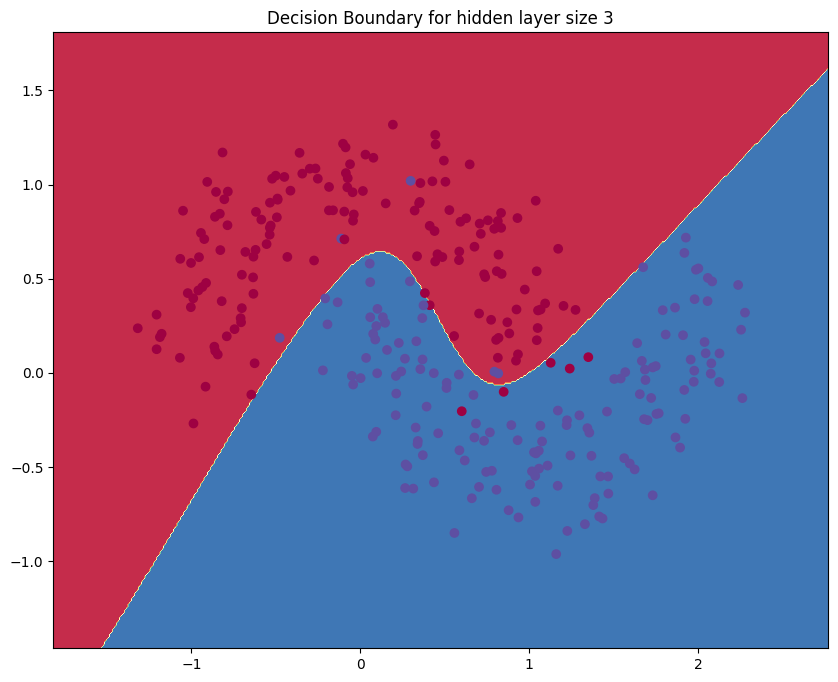

In [209]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model,x))
plt.title("Decision Boundary for hidden layer size 3")

So, as we predicted in Question 6, by using an MLP model, we project our inputs data points into another space (the hidden layer), where we can linearly separate our classes (the output layer). We can observe this phenomenon by looking at the curve of the decision boundary of our MLP model, which differs from the straight line drawn by the previous regression model.

# Application on a real dataset

We will now apply our model on a real dataset well known in the world of Machine Learning : le MNIST (https://en.wikipedia.org/wiki/MNIST_database) which is on Sklearn.

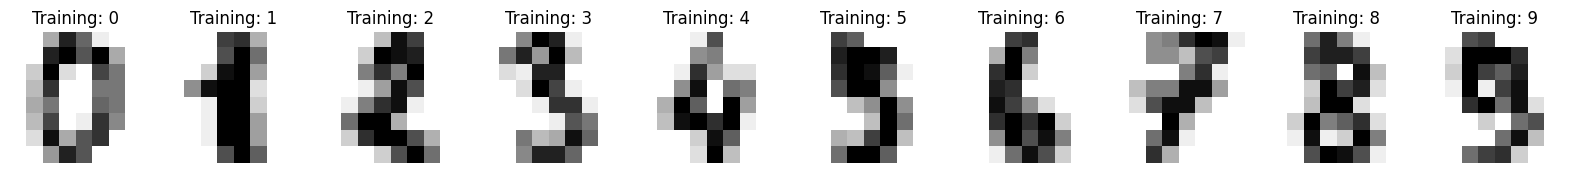

In [210]:
digits = sklearn.datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [211]:
X =  digits.images.reshape((n_samples, -1)) # We reshape the images into vector

y = digits.target


<font color='red'><b> Question 13 </b></font> Complete the input and output dimensions of your network so that it is adapted to the MNIST Dataset and restart the training (be careful, the training will now take a few minutes without additional code optimization).


In [212]:
N = len(X) 
d_input = 8*8 #TODO The image shape is 8x8 pixels
d_output = 10 #TODO We the classes (numbers from 0 to 9)
d_hidden = 20 

# Gradient descent parameter
epsilon = 0.001 

In [213]:
model = init_model(d_input,d_hidden,d_output)
model = train_model(model,d_hidden, num_epochs=200, print_loss=True)
print("The final accuracy obtained is :", accuracy(y, predict(model, X)))


Loss at epoch 0: 2.877707
Loss at epoch 50: 0.390043
Loss at epoch 100: 0.143421
Loss at epoch 150: 0.092790
The final accuracy obtained is : 0.991652754590985


<font color='red'><b> Question 14 </b></font> : 
Divide the MNIST dataset into training and validation datasets.
Find good hyper-parameters on your model. Why create a validation dataset?


In [214]:
X_save = X
y_save = y

# Create a permutation of indices to randomly shuffle our data points
indices = np.random.permutation(len(X_save))
ratio=0.7 #Ratio of data in our training dataset
# Shuffle X and y using the permutation
X_shuffled = X_save[indices]
y_shuffled = y_save[indices]

# Split the shuffled data into training and validation sets
X = X_shuffled[:int(len(X_save)*ratio)]
y = y_shuffled[:int(len(X_save)*ratio)]
X_val = X_shuffled[int(len(X_save)*ratio):]
y_val = y_shuffled[int(len(X_save)*ratio):]
model = init_model(d_input,d_hidden,d_output)
model = train_model(model,d_hidden, num_epochs=200, print_loss=True)
print("The final accuracy obtained on validation is :", accuracy(y_val, predict(model, X_val)))

Loss at epoch 0: 2.008917
Loss at epoch 50: 0.333186
Loss at epoch 100: 0.106805
Loss at epoch 150: 0.074964
The final accuracy obtained on validation is : 0.9685185185185186


The validation set allow us to mesure the accuracy of our model on unseen data, that can provide a better estimation of the aibility of generalization of our model than the accuracy on the train set. And as we can see the accuracy on the test dataset is lower than for the train dataset observed in the previous question.

<font color='red'><b> Question 14 Bonus </b></font> 
How can you ensure that your accuracy on the validation set is significantly different from that of the training set? Find such hyperparameters and plot the accuracy on the training set and on the validation set during the training of your network (according to the epochs). What do you observe?

In [215]:
def train_model(model, nn_hdim, num_epochs=1, print_loss=False):

    W1 = model['W1']
    b1 = model['b1']
    W2 = model['W2']
    b2 = model['b2']
    history_val=[]
    history_train=[]

    # Gradient descent. For each batch...
    for i in range(0, num_epochs):
        
        ##Validation
        
        
        history_val.append(accuracy(y_val,predict(model,X_val)))
        history_train.append(accuracy(y,predict(model,X)))

        ##Training
        # Forward propagation (copy/paste inside forward_function previously defined)
        z1 = forward_layer(X, W1, b1)  # Output of the first layer
        a1 = [[sigmoid(z) for z in z_row] for z_row in z1]  # Sigmoid activation of the first layer
        z2 =  forward_layer(a1, W2, b2)  # Output of the second layer
        exp_scores = [[exp(z) for z in z_row] for z_row in z2]# Compute exp(z2)
        probs = [[exp/sum(exp_row) for exp in exp_row] for exp_row in exp_scores]
        # Estimate the loss (c)
        
        correct_logprobs = [log(x_indiv[y_indiv]) for x_indiv, y_indiv in zip(probs, y)]# Calculation of cross entropy for each example
        
        data_loss = -1./N * sum(correct_logprobs) # Loss totale
        
        

        
        
        # Backpropagation
        #TODO
        

        delta2 = probs
        for output_pred, y_true in zip(delta2, y):
            output_pred[y_true] -= 1
          # Erreur de la deuxième couche
        dW2 = matrix_multiplication(transpose(a1), delta2)  # Gradient des poids de la deuxième couche
        db2 = [sum(d2_row) for d2_row in transpose(delta2)]  # Gradient du biais de la deuxième couche

        delta1 =matrix_multiplication(delta2, transpose(W2))  # Erreur de la première couche
        delta1 = [[sigmoid_derivative(z)*d1 for z,d1 in zip(z1_row,d1_row)] for z1_row, d1_row in zip(z1,delta1)]
        dW1 = matrix_multiplication(transpose(X), delta1)  # Gradient des poids de la première couche
        db1 = [sum(d1_row) for d1_row in transpose(delta1)]  # Gradient du biais de la première couche
        
        
        # Gradient descente
        W1 =[[w - epsilon * d for d, w in zip(dW1_row, W1_row)]for dW1_row, W1_row in zip(dW1, W1)]
        b1 = [b - epsilon * d for b, d in zip(b1, db1)]
        W2 = [[w - epsilon * d for d, w in zip(dW1_row, W1_row)]for dW1_row, W1_row in zip(dW2, W2)]
        b2 = [b - epsilon * d for b, d in zip(b2, db2)]
        # Updating weights and biases
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Loss display
        if print_loss and i % 50 == 0:
          
          print("Loss at epoch %i: %f" %(i, data_loss))
      
    return model,history_train,history_val

Loss at epoch 0: 2.008917
Loss at epoch 50: 0.333186
Loss at epoch 100: 0.106805
Loss at epoch 150: 0.074964
The final accuracy obtained on validation is : 0.9685185185185186


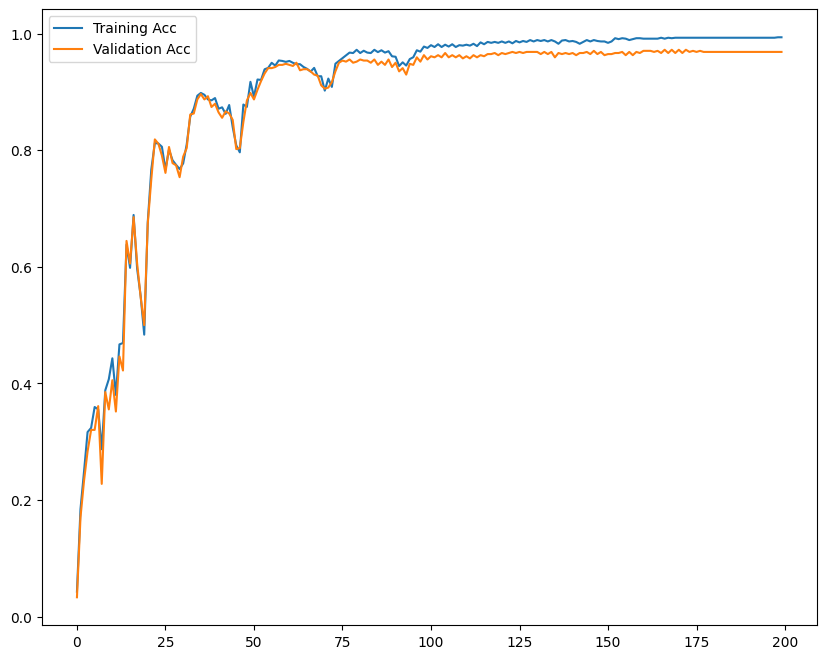

In [216]:
model = init_model(d_input, d_hidden, d_output)
model, hist_t, hist_v = train_model(model, d_hidden, num_epochs=200, print_loss=True)
print("The final accuracy obtained on validation is :", accuracy(y_val, predict(model, X_val)))

# Plotting the training and validation history
plt.plot(hist_t, label='Training Acc')
plt.plot(hist_v, label='Validation Acc')

# Adding legend
plt.legend()

# Display the plot
plt.show()

By looking at the plot of the previous cell, we can see that from the 75th epoch, the training accuracy stays mostly higher than the validation accuracy. It means that after a certain number of epochs, the model begins to overfit on the training data and loses performance in terms of generalization. 

<font color='red'><b> Questions 15 (Bonus) </b></font> There are many ways to make your neural network more efficient, you can find out about the following points of improvement of your choice, explain their usefulness and implement those you want by analyzing the new results obtained (on the game of data of your choice). Don’t hesitate to be curious and look for good resources to help you!

* UUsing the Numpy library to handle matrix operations, rather than using Python lists of lists (this will simplify your code and should reduce training times by several orders of magnitude depending on the size of your network, allowing you to to train larger networks and better optimize hyperparameters on the MNIST dataset)
* Add Weight Decay (https://fr.wikipedia.org/wiki/Weight_decay) 
* Stochastic or Batch Gradient Descent (https://fr.wikipedia.org/wiki/Algorithme_du_gradient_stochastique)
* Added more layers (make the number of layers a model parameter)

# Numpy
We will use the numpy library to implement our MLP model in this part. We made some changement in the code but the principle stay the same.

In [217]:
def init_model(d_input: int, d_hidden: int, d_output: int):
    """
    Args:
        d_input (int): dimension of the input
        d_hidden (int): dimension of the hidden layer
        d_output (int): dimension of the output

    Returns:
        dict: Dictionary containing 4 keys, the weights/biases (W1,b1) and (W2,b2) of the neural network.
        Each of these weights and biases are lists or list of lists of float.
    """
    # Initialization of random parameters
    random.seed(0)
    # First layer of size d_input x d_hidden
    W1 = np.random.rand(d_input,d_hidden)-0.5 #TODO
    # Bias of the first layer vector of size d_hidden
    b1 = np.random.rand(1,d_hidden)-0.5 #TODO
    # Second layer of size d_hidden x d_output
    W2 = np.random.rand(d_hidden,d_output)-0.5
    # The bias of the second layer
    b2 = np.random.rand(1,d_output)-0.5 #TODO
    # The model returned at the end is a dictionary of weights and biases
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return model

In [218]:
# dot product between two vectors
def dot_product(v1, v2):
    
    return np.dot(v1,v2)

# Add two vectors
def add_bias(v1, v2):
    return v1+v2
# Get the columns number "index" of W
def get_columns(W, index):
    return W[:,index]

# Transpose a matrix
def transpose(W):
   
    return W.T

# Multiplication between two matrices()
def matrix_multiplication(X, W):
 

    return np.dot(X, W)

In [219]:
def forward_layer(X, W, b):
    v= matrix_multiplication(X,W)
    return add_bias(v,b)

In [220]:
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation, like before
    z1 = forward_layer(x,W1,b1) 
    a1 = sigmoid(z1)
    z2 = forward_layer(a1,W2,b2) 
    exp_scores =np.exp(z2)
    probs = exp_scores/np.sum(exp_scores)
    return np.argmax(probs, axis=1)

In [221]:
def forward_function(x,W1,b1,W2,b2):     
    z1 = forward_layer(x,W1,b1) 
    a1 = sigmoid(z1)
    z2 = forward_layer(a1,W2,b2) 
    exp_scores =np.exp(z2)
    probs = exp_scores/np.sum(exp_scores)
    return probs

In [222]:
model_test = init_model(4,3,2)
X_debug = [[random.random() for i in range(4)]] # Test with an example in dimension 2
forward_function(X_debug, model_test['W1'], model_test['b1'], model_test['W2'], model_test['b2'])

array([[0.4670522, 0.5329478]])

In [223]:
def train_model(model, nn_hdim, num_epochs=1, print_loss=False):

    W1 = model['W1']
    b1 = model['b1']
    W2 = model['W2']
    b2 = model['b2']
    history_val=[]
    history_train=[]

    # Gradient descent. For each batch...
    for i in range(0, num_epochs):
        
        
        history_val.append(accuracy(y_val,predict(model,X_val)))
        history_train.append(accuracy(y,predict(model,X)))

        ##Training
        # Forward propagation (copy/paste inside forward_function previously defined)
        z1 = forward_layer(X, W1, b1)  # Output of the first layer
        a1 = sigmoid(z1) # Sigmoid activation of the first layer
        z2 =  forward_layer(a1, W2, b2)  # Output of the second layer
        exp_scores = np.exp(z2)# Compute exp(z2)
        probs = exp_scores/np.sum(exp_scores,axis=1,keepdims=True) #Compute the softmax function for the output layer
        
        
        correct_logprobs = np.log(probs[np.arange(probs.shape[0]), y])# Calculation of cross entropy for each example
        
        data_loss = -1./N * np.sum(correct_logprobs,axis=0,keepdims=True) # Loss totale
        
        

        
        
        # Backpropagation

        delta2 = probs.copy()
        delta2[np.arange(probs.shape[0]), y] -= 1
        dW2 = matrix_multiplication(transpose(a1), delta2) 
        db2 = np.sum(delta2, axis=0, keepdims=True) 

        delta1 =sigmoid_derivative(z1) * matrix_multiplication(delta2, transpose(W2))  
        dW1 = matrix_multiplication(transpose(X), delta1) 
        db1 = np.sum(delta1, axis=0, keepdims=True)
        
        
        # Gradient descente
        W1 -= epsilon * dW1
        b1 -= epsilon * db1
        W2 -= epsilon * dW2
        b2 -= epsilon * db2
        # Updating weights and biases
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Loss display
        if print_loss and i % 50 == 0:

          print("Loss at epoch %i: %f" %(i, data_loss))
      
    return model,history_train,history_val

Loss at epoch 0: 0.069300
Loss at epoch 50: 0.031749


/tmp/ipykernel_5942/3646216433.py:57: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Loss at epoch %i: %f" %(i, data_loss))


Loss at epoch 100: 0.031642
Loss at epoch 150: 0.031619
Loss at epoch 200: 0.031604
Loss at epoch 250: 0.031592
Loss at epoch 300: 0.031581
Loss at epoch 350: 0.031569
Loss at epoch 400: 0.031555
Loss at epoch 450: 0.031539
Loss at epoch 500: 0.031515
Loss at epoch 550: 0.031477
Loss at epoch 600: 0.031398
Loss at epoch 650: 0.031172
Loss at epoch 700: 0.030192
Loss at epoch 750: 0.026173
Loss at epoch 800: 0.019617
Loss at epoch 850: 0.014920
Loss at epoch 900: 0.012220
Loss at epoch 950: 0.010585
Loss at epoch 1000: 0.009505
Loss at epoch 1050: 0.008744
Loss at epoch 1100: 0.008178
Loss at epoch 1150: 0.007743
Loss at epoch 1200: 0.007399
Loss at epoch 1250: 0.007121
Loss at epoch 1300: 0.006891
Loss at epoch 1350: 0.006698
Loss at epoch 1400: 0.006534
Loss at epoch 1450: 0.006394
Loss at epoch 1500: 0.006271
Loss at epoch 1550: 0.006164
Loss at epoch 1600: 0.006069
Loss at epoch 1650: 0.005985
Loss at epoch 1700: 0.005909
Loss at epoch 1750: 0.005841
Loss at epoch 1800: 0.005779
Los

Text(0.5, 1.0, 'Results by with numpy')

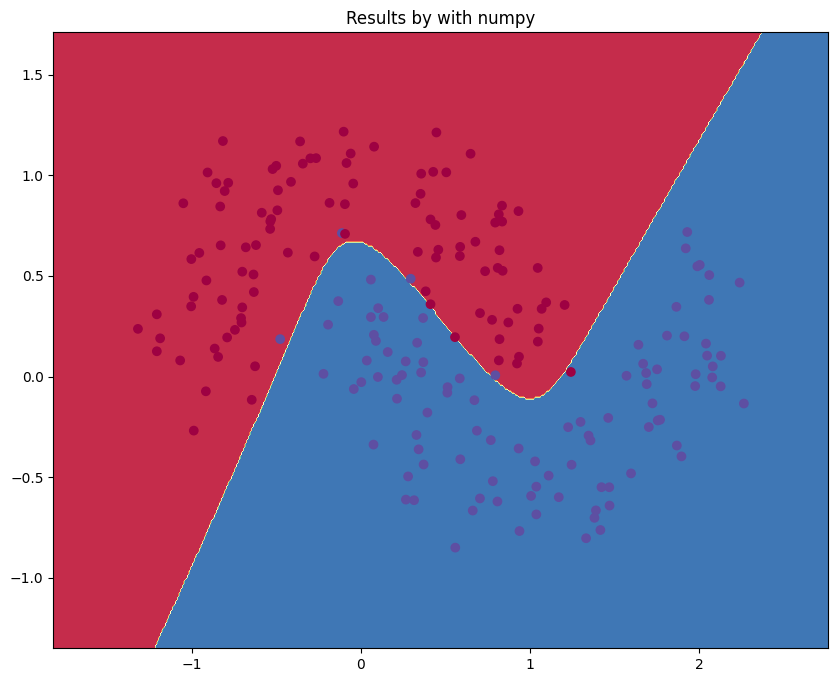

In [224]:
np.random.seed(1)
X, y = sklearn.datasets.make_moons(300, noise=0.20)
X_save = X
y_save = y

# Create a permutation of indices
indices = np.random.permutation(len(X_save))

# Shuffle X and y using the permutation
X_shuffled = X_save[indices]
y_shuffled = y_save[indices]

# Split the shuffled data into training and validation sets
X = X_shuffled[:200]
y = y_shuffled[:200]
X_val = X_shuffled[200:]
y_val = y_shuffled[200:]


# dimension of the input
d_input = 2 

# dimension of the output
d_output = 2 

# dimension of the hidden layer i.e. number of neurons in the hidden layer
d_hidden = 32 



# learning rate for the gradient descente algorithm
epsilon = 0.01 
model = init_model(d_input,d_hidden,d_output)
model,train,val = train_model(model,d_hidden, num_epochs=2000, print_loss=True)
print("The final accuracy obtained is :", accuracy(y, predict(model, X)))
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Results by with numpy")

The optimization made by the numpy library improve the speed of the trainning of our model, that allow us to perform more epochs in less time compare to the list of list implementation.


## Weight Decay
In this section we introduce a regularization mechanism in the trainning function to minimize the overfitting of our model. We use the weights Decay regularization principle which consist in adding in the loss functions of our model the magnitude of the weights of our model. The computation of the gradients of the weights of our models with the new loss formula are given bellow : 
$$
\begin{aligned} 
&L(y,\hat{y})= - \frac{1}{N} \sum_{n \in N} \sum_{i \in C} y_{n,i} \log\hat{y}_{n,i} + \lambda (\sum_{i \in d_{input}} \sum_{j \in d_{hidden}} W_{1_{i,j}}^2 + \sum_{i \in d_{hidden}} b_{1_i}^2 + \sum_{i \in d_{hidden}} \sum_{j \in C} W_{2_{i,j}}^2 + \sum_{i \in C} b_{2_i}
^2)\newline
& \delta_2 =\frac{\partial{L}}{\partial{z_2}}= a_2 - y\newline
& \delta_1 = \frac{\partial{L}}{\partial{z_1}}=z_1( 1 - z_1^T ) * \delta_2 W_2^T  \newline
& \frac{\partial{L}}{\partial{W_2}} =\frac{\partial{L}}{\partial{z_2}}. \frac{\partial{z_2}}{\partial{W_2}}+\frac{\partial{\lambda\sum_{i \in d_{hidden}} \sum_{j \in C} W_{2_{i,j}}^2}}{\partial{W_2}} =a_1^T \delta_2 +2\lambda W_2\newline
& \frac{\partial{L}}{\partial{b_2}} =\frac{\partial{L}}{\partial{z_2}}. \frac{\partial{z_2}}{\partial{b_2}} + \frac{\partial{\lambda \sum_{i \in C} b_{2_i}^2}}{\partial{b_2}}=(\sum_{i \in C} \delta_{2_i}) + 2\lambda b_2\newline
& \frac{\partial{L}}{\partial{W_1}} =\frac{\partial{L}}{\partial{z_1}}. \frac{\partial{z_1}}{\partial{W_1}}+\frac{\partial{\lambda\sum_{i \in d_{input}} \sum_{j \in d_{hidden}} W_{1_{i,j}}^2}}{\partial{W_1}}= X^T \delta_1 +2\lambda W_1\newline
& \frac{\partial{L}}{\partial{b_1}} = \frac{\partial{L}}{\partial{z_1}}. \frac{\partial{z_1}}{\partial{b_1}}+ \frac{\partial{\lambda \sum_{i \in d_{hidden}} b_{1_i}^2}}{\partial{b_1}}=(\sum_{i \in d_{hidden}}\delta_{1_i} )+ 2\lambda b_1\newline
\end{aligned}
$$

In [225]:
WD_param=0.01
def train_model(model, nn_hdim, num_epochs=1, print_loss=False):

    W1 = model['W1']
    b1 = model['b1']
    W2 = model['W2']
    b2 = model['b2']
    history_val=[]
    history_train=[]

    # Gradient descent. For each batch...
    for i in range(0, num_epochs):
        
        ##Validation
        
        
        history_val.append(accuracy(y_val,predict(model,X_val)))
        history_train.append(accuracy(y,predict(model,X)))

        ##Training
        # Forward propagation (copy/paste inside forward_function previously defined)
        z1 = forward_layer(X, W1, b1)  # Output of the first layer
        a1 = sigmoid(z1) # Sigmoid activation of the first layer
        z2 =  forward_layer(a1, W2, b2)  # Output of the second layer
        exp_scores = np.exp(z2)# Compute exp(z2)
        probs = exp_scores/np.sum(exp_scores,axis=1,keepdims=True)
        # Estimate the loss (c)
        
        correct_logprobs = np.log(probs[np.arange(probs.shape[0]), y])# Calculation of cross entropy for each example
        

        # Computing the magnitude of the weights and biais of our model
        l_W1=WD_param* np.sum((np.array(W1)*np.array(W1)))
        l_b1=WD_param* np.sum((np.array(b1)*np.array(b1)))
        l_W2=WD_param* np.sum((np.array(W2)*np.array(W2)))
        l_b2=WD_param* np.sum((np.array(b2)*np.array(b2)))
        data_loss = -1./N * np.sum(correct_logprobs,axis=0,keepdims=True)+l_W1+l_b1+l_W2+l_b2 # Loss totale
        
        

        
        
        # Backpropagation with the weights decay principle
        #TODO
       

        delta2 = probs.copy()
        delta2[np.arange(probs.shape[0]), y] -= 1
        
        dW2 = matrix_multiplication(transpose(a1), delta2) + 2.0*WD_param*np.array(W2)  
        db2 = np.sum(delta2, axis=0, keepdims=True) + 2.0*WD_param*np.array(b2) 

        delta1 = sigmoid_derivative(z1) * matrix_multiplication(delta2, transpose(W2))  
        dW1 = matrix_multiplication(transpose(X), delta1) + 2.0*WD_param*np.array(W1)
        db1 = np.sum(delta1, axis=0, keepdims=True) + 2.0*WD_param*np.array(b1)
        
        
        # Gradient descente
        W1 -= epsilon * dW1
        b1 -= epsilon * db1
        W2 -= epsilon * dW2
        b2 -= epsilon * db2
        # Updating weights and biases
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Loss display
        if print_loss and i % 50 == 0:
         
          print("Loss at epoch %i: %f" %(i, data_loss))
      
    return model#,history_train,history_val

/tmp/ipykernel_5942/2196738178.py:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Loss at epoch %i: %f" %(i, data_loss))


Loss at epoch 0: 0.209333
Loss at epoch 50: 0.234059
Loss at epoch 100: 0.270838
Loss at epoch 150: 0.300063
Loss at epoch 200: 0.324417
Loss at epoch 250: 0.345002
Loss at epoch 300: 0.362123
Loss at epoch 350: 0.376079
Loss at epoch 400: 0.387277
Loss at epoch 450: 0.396167
Loss at epoch 500: 0.403174
Loss at epoch 550: 0.408667
Loss at epoch 600: 0.412957
Loss at epoch 650: 0.416293
Loss at epoch 700: 0.418878
Loss at epoch 750: 0.420872
Loss at epoch 800: 0.422403
Loss at epoch 850: 0.423571
Loss at epoch 900: 0.424456
Loss at epoch 950: 0.425121
Loss at epoch 1000: 0.425616
Loss at epoch 1050: 0.425979
Loss at epoch 1100: 0.426241
Loss at epoch 1150: 0.426427
Loss at epoch 1200: 0.426555
Loss at epoch 1250: 0.426642
Loss at epoch 1300: 0.426699
Loss at epoch 1350: 0.426736
Loss at epoch 1400: 0.426761
Loss at epoch 1450: 0.426780
Loss at epoch 1500: 0.426798
Loss at epoch 1550: 0.426820
Loss at epoch 1600: 0.426849
Loss at epoch 1650: 0.426889
Loss at epoch 1700: 0.426942
Loss at 

Text(0.5, 1.0, 'Results by adding weights decay')

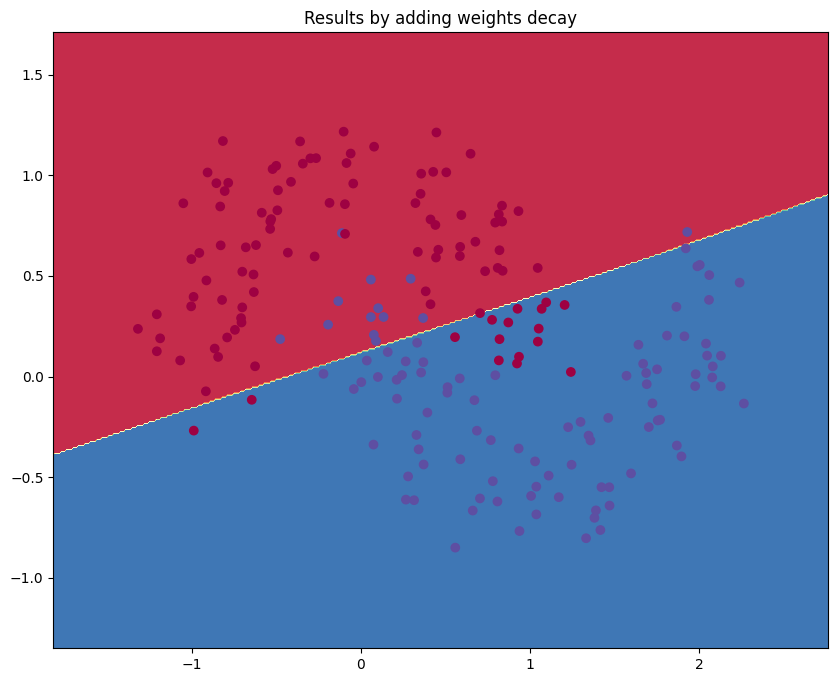

In [226]:

np.random.seed(1)
X, y = sklearn.datasets.make_moons(300, noise=0.20)
X_save = X
y_save = y

# Create a permutation of indices
indices = np.random.permutation(len(X_save))

# Shuffle X and y using the permutation
X_shuffled = X_save[indices]
y_shuffled = y_save[indices]

# Split the shuffled data into training and validation sets
X = X_shuffled[:200]
y = y_shuffled[:200]
X_val = X_shuffled[200:]
y_val = y_shuffled[200:]


# dimension of the input
d_input = 2 

# dimension of the output
d_output = 2 

# dimension of the hidden layer i.e. number of neurons in the hidden layer
d_hidden = 32 



# learning rate for the gradient descente algorithm
epsilon = 0.001 
model = init_model(d_input,d_hidden,d_output)
model = train_model(model,d_hidden, num_epochs=2000, print_loss=True)
print("The final accuracy obtained is :", accuracy(y, predict(model, X)))
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Results by adding weights decay")

We can see that with the regularization and with the same number of epochs as for the previous training, the curve of the decision boundary is more flat than the one for the model without regularization. It's due to the fact that the model train with regularization is less complex in terms of the values of the parameters.

## Stochastic/Batch Gradient Descent
In this section we use the stochastic/batch gradient descent in the training of our model, it mean that for each epochs we use a single/batch datapoint to compute the gradient of the weights. The computation of the gradients don't change from what we defined for the previous section.

In [227]:
WD_param=0.01
def train_model(model, nn_hdim, num_epochs=1, print_loss=False):

    W1 = model['W1']
    b1 = model['b1']
    W2 = model['W2']
    b2 = model['b2']
    history_val=[]
    history_train=[]

    # Gradient descent. For each batch...
    for i in range(0, num_epochs):
        
        ##Validation
        idx=np.random.randint(len(X),size=(1,32)) #Actually is a batch gradient descent using 10 datapoints per batch but we can replace the size by (1,1) to have a stochastic gradient descent
        X_i=X[idx[0]]
        y_i=y[idx[0]]
        
        history_val.append(accuracy(y_val,predict(model,X_val)))
        history_train.append(accuracy(y,predict(model,X)))

        ##Training
        # Forward propagation (copy/paste inside forward_function previously defined)
        z1 = forward_layer(X_i, W1, b1)  # Output of the first layer
        a1 = sigmoid(z1) # Sigmoid activation of the first layer
        z2 =  forward_layer(a1, W2, b2)  # Output of the second layer
        exp_scores = np.exp(z2)# Compute exp(z2)
        probs = exp_scores/np.sum(exp_scores,axis=1,keepdims=True)
        # Estimate the loss (c)
        
        correct_logprobs = np.log(probs[np.arange(probs.shape[0]), y_i])# Calculation of cross entropy for each example
        
        l_W1=WD_param* np.sum((np.array(W1)*np.array(W1)))
        l_b1=WD_param* np.sum((np.array(b1)*np.array(b1)))
        l_W2=WD_param* np.sum((np.array(W2)*np.array(W2)))
        l_b2=WD_param* np.sum((np.array(b2)*np.array(b2)))
        data_loss = -1./N * np.sum(correct_logprobs,axis=0,keepdims=True)+l_W1+l_b1+l_W2+l_b2 # Loss totale 
        
        

        
        
        # Backpropagation
        #TODO
        

        delta2 = probs.copy()
        delta2[np.arange(probs.shape[0]), y_i] -= 1
          
        dW2 = matrix_multiplication(transpose(a1), delta2) + 2.0*WD_param*np.array(W2) 
        db2 = np.sum(delta2, axis=0, keepdims=True) + 2.0*WD_param*np.array(b2)  

        delta1 = sigmoid_derivative(z1) * matrix_multiplication(delta2, transpose(W2))
        dW1 = matrix_multiplication(transpose(X_i), delta1) + 2.0*WD_param*np.array(W1)
        db1 = np.sum(delta1, axis=0, keepdims=True) + 2.0*WD_param*np.array(b1)  
        
        
        # Gradient descente
        W1 -= epsilon * dW1
        b1 -= epsilon * db1
        W2 -= epsilon * dW2
        b2 -= epsilon * db2
        # Updating weights and biases
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Loss display
        if print_loss and i % 50 == 0:
          print("Loss at epoch %i: %f" %(i, data_loss))
      
    return model,history_train,history_val

/tmp/ipykernel_5942/513959017.py:68: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Loss at epoch %i: %f" %(i, data_loss))


Loss at epoch 0: 0.151387
Loss at epoch 50: 0.155070
Loss at epoch 100: 0.161832
Loss at epoch 150: 0.169063
Loss at epoch 200: 0.177933
Loss at epoch 250: 0.186485
Loss at epoch 300: 0.193162
Loss at epoch 350: 0.201661
Loss at epoch 400: 0.206884
Loss at epoch 450: 0.214195
Loss at epoch 500: 0.222547
Loss at epoch 550: 0.227918
Loss at epoch 600: 0.232437
Loss at epoch 650: 0.237051
Loss at epoch 700: 0.241745
Loss at epoch 750: 0.247842
Loss at epoch 800: 0.252198
Loss at epoch 850: 0.257286
Loss at epoch 900: 0.261539
Loss at epoch 950: 0.264410
Loss at epoch 1000: 0.270747
Loss at epoch 1050: 0.274151
Loss at epoch 1100: 0.277157
Loss at epoch 1150: 0.284761
Loss at epoch 1200: 0.282365
Loss at epoch 1250: 0.286606
Loss at epoch 1300: 0.290200
Loss at epoch 1350: 0.293970
Loss at epoch 1400: 0.296190
Loss at epoch 1450: 0.299489
Loss at epoch 1500: 0.305481
Loss at epoch 1550: 0.305907
Loss at epoch 1600: 0.308642
Loss at epoch 1650: 0.313478
Loss at epoch 1700: 0.314802
Loss at 

Text(0.5, 1.0, 'Results by adding batch gradient descent')

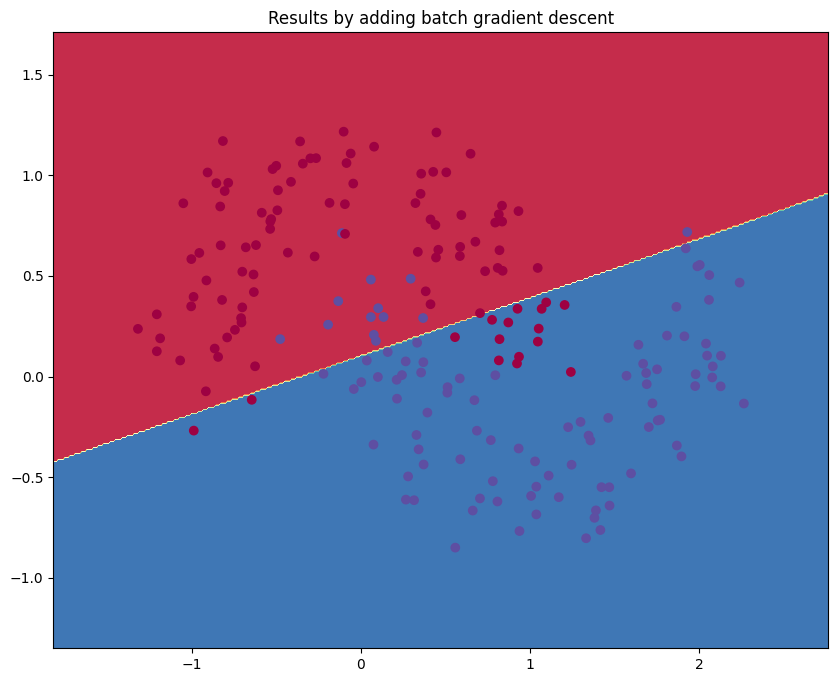

In [228]:
np.random.seed(1)
X, y = sklearn.datasets.make_moons(300, noise=0.20)
X_save = X
y_save = y

# Create a permutation of indices
indices = np.random.permutation(len(X_save))

# Shuffle X and y using the permutation
X_shuffled = X_save[indices]
y_shuffled = y_save[indices]

# Split the shuffled data into training and validation sets
X = X_shuffled[:200]
y = y_shuffled[:200]
X_val = X_shuffled[200:]
y_val = y_shuffled[200:]


# dimension of the input
d_input = 2 

# dimension of the output
d_output = 2 

# dimension of the hidden layer i.e. number of neurons in the hidden layer
d_hidden = 32 



# learning rate for the gradient descente algorithm
epsilon = 0.001 
model = init_model(d_input,d_hidden,d_output)
model,train,val = train_model(model,d_hidden, num_epochs=10000, print_loss=True)
print("The final accuracy obtained is :", accuracy(y, predict(model, X)))
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Results by adding batch gradient descent")

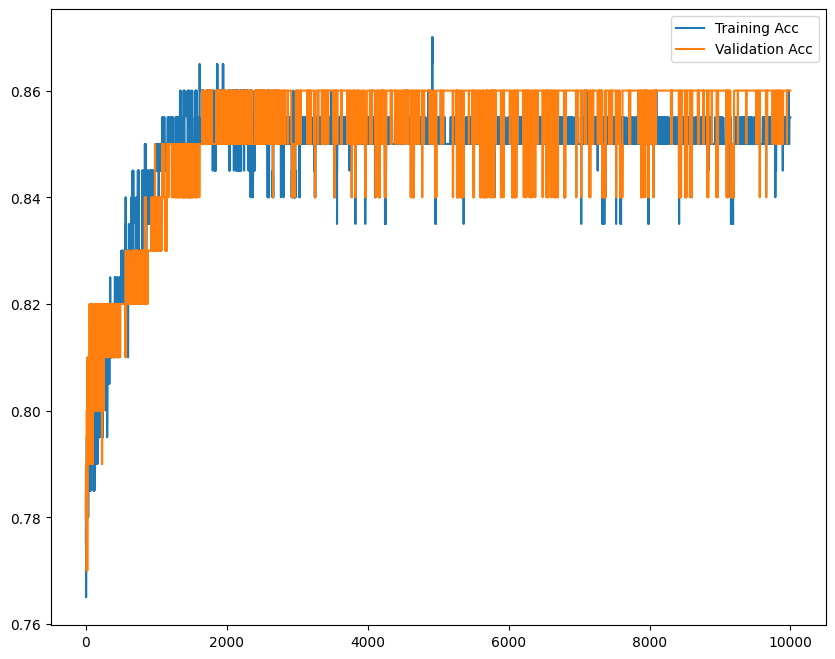

In [229]:
plt.plot(train, label='Training Acc')
plt.plot(val, label='Validation Acc')

# Adding legend
plt.legend()

# Display the plot
plt.show()

We can see that by using a Stochastic/Batch gradient descent, we have not anymore a straight line for the plot of the accuracy observed on the validation and training set. But we can also see that we reduce the difference between the validation and training accuracy by using this Stochastic/Batch gradient descent.

# Adding more layers
<br>
In this section we implement a way to implement MLP models with more than 1 hidden layer, now the 'init_model' function take as parameters:

- d_input : an integer which represent the number of inputs neurons
- d_hidden : a list of integers which represent the numbers of neurons for each hidden layer
- d_output : an integer which represent the number of outputs neurons
<br>
<br>
And now, the function return an Model object define by the attributes:

- nb_hidden : the number of hidden layers
- param : a dictionnary which contain the parameters of the model
<br><br>
We also modify the training function to handle the computation of the gradient for each layer, the computation of each layer is given bellow:
$$
\begin{aligned} 
& if \  i = H\ : \delta_i = \frac{\partial{L}}{\partial{z_i}}= a_i - y \ else \ : \delta_i = \frac{\partial{L}}{\partial{z_i}}=z_i( 1 - z_i^T ) * \delta_{i+1} W_{i+1}^T \newline
& if \  i = 1\ : \frac{\partial{L}}{\partial{W_i}} =\frac{\partial{L}}{\partial{z_i}}. \frac{\partial{z_i}}{\partial{W_i}}+\frac{\partial{\lambda\sum_{j \in d_{input}} \sum_{k \in d_{hidden}} W_{i_{j,k}}^2}}{\partial{W_i}}= X^T \delta_i +2\lambda W_i \ \ else \ : \ \frac{\partial{L}}{\partial{W_i}} =\frac{\partial{L}}{\partial{z_i}}. \frac{\partial{z_i}}{\partial{W_i}}+\frac{\partial{\lambda\sum_{j \in d_{input}} \sum_{k \in d_{hidden}} W_{i_{j,k}}^2}}{\partial{W_i}}= a_{i-1}^T \delta_i +2\lambda W_i \newline
& \frac{\partial{L}}{\partial{b_i}} = \frac{\partial{L}}{\partial{z_i}}. \frac{\partial{z_i}}{\partial{b_i}}+ \frac{\partial{\lambda \sum_{j \in d_{hidden}} b_{i_j}^2}}{\partial{b_i}}=(\sum_{j \in d_{hidden}}\delta_{i_j} )+ 2\lambda b_i\newline
\end{aligned}
$$
Where $H$ represent the number of hidden layers

In [230]:
class Model :
    def __init__(self, nb_hidden, param):
        self.nb_hidden = nb_hidden
        self.param = param


def init_model(d_input: int, d_hidden: list, d_output: int):
    """
    Args:
        d_input (int): dimension of the input
        d_hidden (list): list of dimensions of the hidden layers
        d_output (int): dimension of the output

    Returns:
        Model: An instance of the Model class containing the weights and biases of the MLP.
    """

    random.seed(0)
    
    weights = []
    biases = []
    
    W1 = np.random.rand(d_input, d_hidden[0]) - 0.5
    b1 = np.random.rand(1, d_hidden[0]) - 0.5
    weights.append(W1)
    biases.append(b1)
    
    for i in range(1, len(d_hidden)):
        Wi = np.random.rand(d_hidden[i-1], d_hidden[i]) - 0.5
        bi = np.random.rand(1, d_hidden[i]) - 0.5
        weights.append(Wi)
        biases.append(bi)

    W_out = np.random.rand(d_hidden[-1], d_output) - 0.5
    b_out = np.random.rand(1, d_output) - 0.5
    weights.append(W_out)
    biases.append(b_out)
    
    model_params = {
        'W': weights,
        'b': biases
    }

    model = Model(nb_hidden=len(d_hidden), param=model_params)
    return model

In [231]:
def forward_function(X,params):     
    for i, (w, b) in enumerate(zip(params["W"], params["b"])): # iterate on all the layers of the model
        X = forward_layer(X, w, b)
        if i < len(params["W"]) - 1:  # Apply the sigmoid for all the hidden layers
            X = sigmoid(X)
      
    exp_scores = np.exp(X)# Compute exp(z2)
    probs = exp_scores/np.sum(exp_scores) #Apply softmax activation function 
    return probs
       

In [232]:
def predict(model, x):
    probs = forward_function(x,model.param)
    return np.argmax(probs, axis=1)

In [233]:
def softmax(x):
    exp_scores = np.exp(x)
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

In [234]:
def train_model(model, X, y, X_val, y_val, num_epochs=1, print_loss=False, epsilon=0.01, WD_param=0.0001):
    params = model.param
    history_val = []
    history_train = []

    # Gradient descent. For each batch...
    for i in range(num_epochs):
        # Validation
        idx = np.random.choice(len(X), size=len(X), replace=False) #Here I decided to use the full training dataset to compute the trainging at each epoch
        X_i = X[idx]
        y_i = y[idx]

        history_val.append(accuracy(y_val, predict(model, X_val)))
        history_train.append(accuracy(y, predict(model, X)))

        # Forward propagation
        activations = [X_i] # We consider the first activation as the input layer
        zs = []
        for j, (w, b) in enumerate(zip(params["W"], params["b"])):
            z = forward_layer(activations[-1], w, b)
            zs.append(z)
            if j < len(params["W"]) - 1:  # Apply the sigmoid on the hidden layer
                activation = sigmoid(z)
            else: # Apply the softmax function on the output layer
                activation = softmax(z)
            activations.append(activation)

        probs = activations[-1]
        

        # Estimate the loss (c)
        correct_logprobs = np.log(probs[range(len(y_i)), y_i])
        data_loss = -np.mean(correct_logprobs)
        # Adding to the loss function the magnitude of the weights of the model (weight decay)
        for w, b in zip(params["W"], params["b"]): 
            data_loss += WD_param * (np.sum(w**2) + np.sum(b**2))

        # Backpropagation 
        deltas = [probs] #The delta of the last layer is the difference between the prediction and the target
        deltas[-1][range(len(y_i)), y_i] -= 1

        for j in range(len(params["W"])-2, -1, -1):
            
            delta = sigmoid_derivative(zs[j]) * np.dot(deltas[len(params["W"])-2-j],params["W"][j+1].T)

            deltas.append(delta)
        
        deltas.reverse()
        

        # Gradient descent
        for j in range(len(params["W"])):
            
            params["W"][j] -= epsilon * (np.dot(activations[j].T, deltas[j]) + 2 * WD_param * params["W"][j])
           
            params["b"][j] -= epsilon * (np.sum(deltas[j], axis=0, keepdims=True) + 2 * WD_param * params["b"][j])

        # Loss display
        if print_loss and i % 50 == 0:
            print("Loss at epoch %i: %f" % (i, data_loss))

    return model, history_train, history_val


In [235]:
np.random.seed(1)
X, y = sklearn.datasets.make_moons(300, noise=0.20)
X_save = X
y_save = y

# Create a permutation of indices
indices = np.random.permutation(len(X_save))

# Shuffle X and y using the permutation
X_shuffled = X_save[indices]
y_shuffled = y_save[indices]

# Split the shuffled data into training and validation sets
X = X_shuffled[:200]
y = y_shuffled[:200]
X_val = X_shuffled[200:]
y_val = y_shuffled[200:]



Loss at epoch 0: 0.728923
Loss at epoch 50: 0.716818
Loss at epoch 100: 0.392146
Loss at epoch 150: 0.354910
Loss at epoch 200: 0.349704
Loss at epoch 250: 0.327609
Loss at epoch 300: 0.324056
Loss at epoch 350: 0.322340
Loss at epoch 400: 0.321715
Loss at epoch 450: 0.321542
Loss at epoch 500: 0.321472
Loss at epoch 550: 0.321421
Loss at epoch 600: 0.321397
Loss at epoch 650: 0.321382
Loss at epoch 700: 0.321368
Loss at epoch 750: 0.321356
Loss at epoch 800: 0.321349
Loss at epoch 850: 0.321351
Loss at epoch 900: 0.321362
Loss at epoch 950: 0.321383
Loss at epoch 1000: 0.321416
Loss at epoch 1050: 0.321462
Loss at epoch 1100: 0.321522
Loss at epoch 1150: 0.321596
Loss at epoch 1200: 0.321680
Loss at epoch 1250: 0.321764
Loss at epoch 1300: 0.321834
Loss at epoch 1350: 0.321883
Loss at epoch 1400: 0.321901
Loss at epoch 1450: 0.321878
Loss at epoch 1500: 0.321794
Loss at epoch 1550: 0.321615
Loss at epoch 1600: 0.321272
Loss at epoch 1650: 0.320617
Loss at epoch 1700: 0.319314
Loss at 

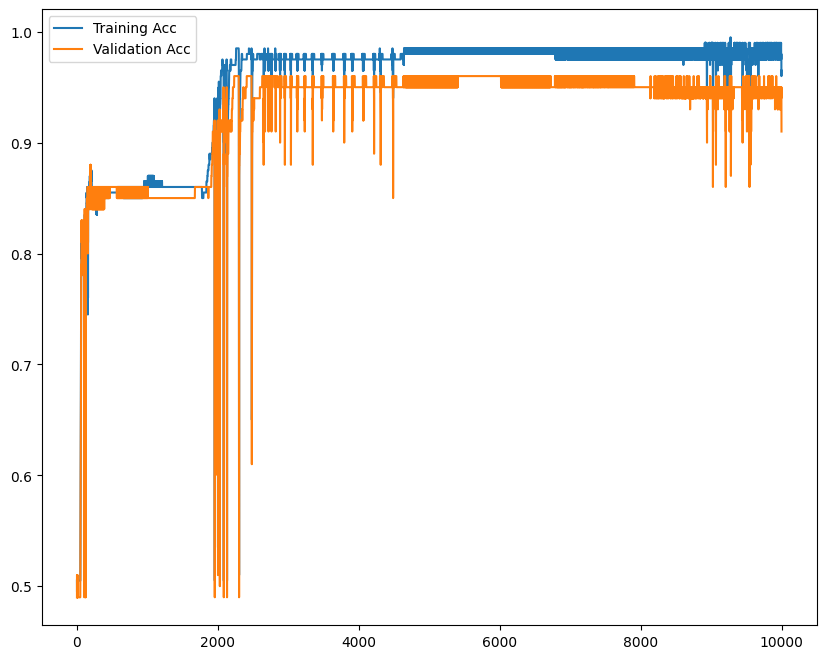

In [236]:
d_input = 2
d_hidden = [32,32,32,32] # 4 hidden layers with 32 neurons for each ones
d_output = 2

model = init_model(d_input, d_hidden, d_output)
model,hist_t,hist_v = train_model(model,X,y,X_val,y_val, num_epochs=10000,epsilon=0.01, print_loss=True)
print("The final accuracy obtained is :", accuracy(y_val, predict(model, X_val)))

plt.plot(hist_t, label='Training Acc')
plt.plot(hist_v, label='Validation Acc')

# Adding legend
plt.legend()

# Display the plot
plt.show()

Text(0.5, 1.0, 'Results by adding multiple layers')

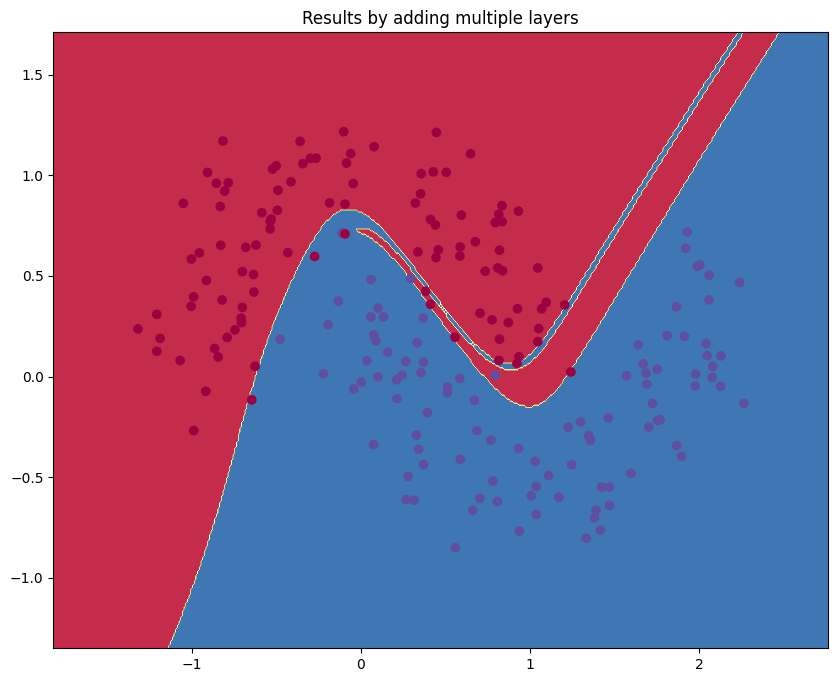

In [237]:
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Results by adding multiple layers")

We can see that by using multiple hidden layers, our model defines a more complex decision boundary, as we can see on the graph. This phenomenon is due to the multiple space projections made during the forward pass of our data points through the multiple hidden layers.

Loss at epoch 0: 2.843263
Loss at epoch 50: 2.387032
Loss at epoch 100: 2.303073
Loss at epoch 150: 2.169805
Loss at epoch 200: 1.963967
Loss at epoch 250: 1.707732
Loss at epoch 300: 1.451638
Loss at epoch 350: 1.219718
Loss at epoch 400: 1.022173
Loss at epoch 450: 0.865050
Loss at epoch 500: 0.742553
Loss at epoch 550: 0.646938
Loss at epoch 600: 0.571745
Loss at epoch 650: 0.511641
Loss at epoch 700: 0.463712
Loss at epoch 750: 0.424837
Loss at epoch 800: 0.393002
Loss at epoch 850: 0.366938
Loss at epoch 900: 0.345614
Loss at epoch 950: 0.327930
The final accuracy obtained is : 0.9407407407407408


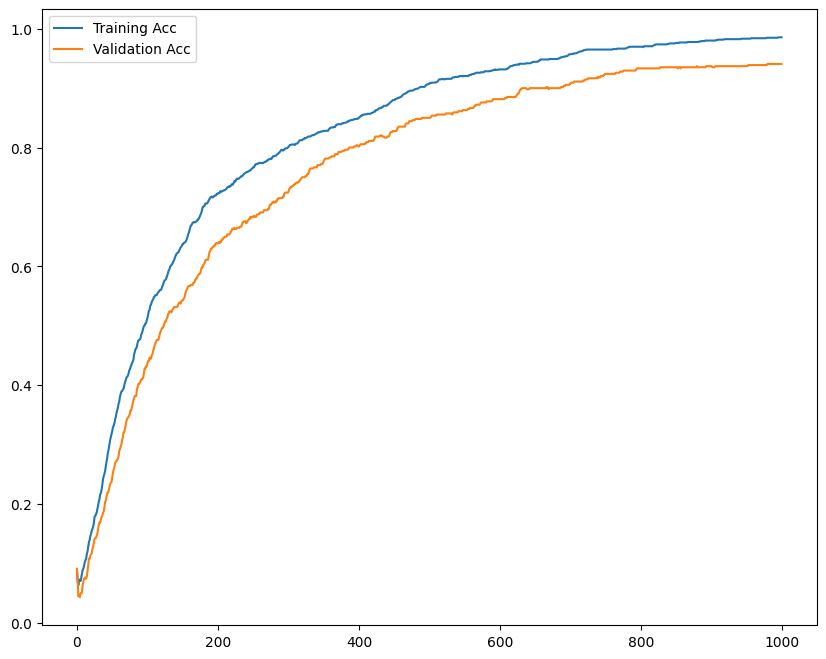

In [238]:
X =  digits.images.reshape((n_samples, -1)) # We reshape the images into vector
N = len(X) 
y = digits.target
X_save = X
y_save = y

# Create a permutation of indices
indices = np.random.permutation(len(X_save))

# Shuffle X and y using the permutation
X_shuffled = X_save[indices]
y_shuffled = y_save[indices]
split=int(N*0.7)
# Split the shuffled data into training and validation sets
X = X_shuffled[:split]
y = y_shuffled[:split]
X_val = X_shuffled[split:]
y_val = y_shuffled[split:]

d_input = 8*8 #TODO
d_output = 10 #TODO 
d_hidden = [64,64,64,64]  # 4 hidden layers with dimensions 64


model = init_model(d_input, d_hidden, d_output)
model,hist_t,hist_v = train_model(model,X,y,X_val,y_val ,num_epochs=1000,epsilon=0.0001, print_loss=True)
print("The final accuracy obtained is :", accuracy(y_val, predict(model, X_val)))

plt.plot(hist_t, label='Training Acc')
plt.plot(hist_v, label='Validation Acc')

# Adding legend
plt.legend()

# Display the plot
plt.show()
